# Introduction

This notebook will focus primarily statistical side of the time series modelling, including how to define Correlation's, the concept of Stationarity, Auto-Correlation & Partial Auto-Correlation Function & statistical tests

<b>Interesting Read : </b>[STAT 510](https://online.stat.psu.edu/stat510/)

<img src='../Materials/stat_501.png' width='550' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Imports

In [1]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# DataHandler
from helperhandler import dataHolder

# Path and Variable Initialisation

In [2]:
root_path = '../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('ggplot')

# Load & Explore the data

In [4]:
dataHolder.load_data()

In [5]:
dataHolder.dataDf

,Handle,Short Description
0,airp_data,Air Passengers
1,mprod_data,Milk Production
2,brit_stock,Britannia Stock Price
3,india_cpi,India CPI
4,beer_prod,Beer Production
5,house_price,Housing Prices
6,airp_data_missing,Air Passengers - Missing
7,housing_missing,Housing Data - Missing
8,pop_ener,Population & Energy
9,usa_cpi,USA-CPI


## USA Consumer, Income, Production, Savings & Unemployment Data

In [6]:
k='usa_economic'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

USA Economic Numbers  (Quaterly), in Million, from 1970 to 2016


,Consumption,Income,Production,Savings,Unemployment
Date,,,,,
1970-01-01,0.615986,0.972261,-2.452700,4.810312,0.9
1970-04-01,0.460376,1.169085,-0.551525,7.287992,0.5
1970-07-01,0.876791,1.553271,-0.358708,7.289013,0.5
1970-10-01,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971-01-01,1.897371,1.987154,1.909734,3.657771,-0.1


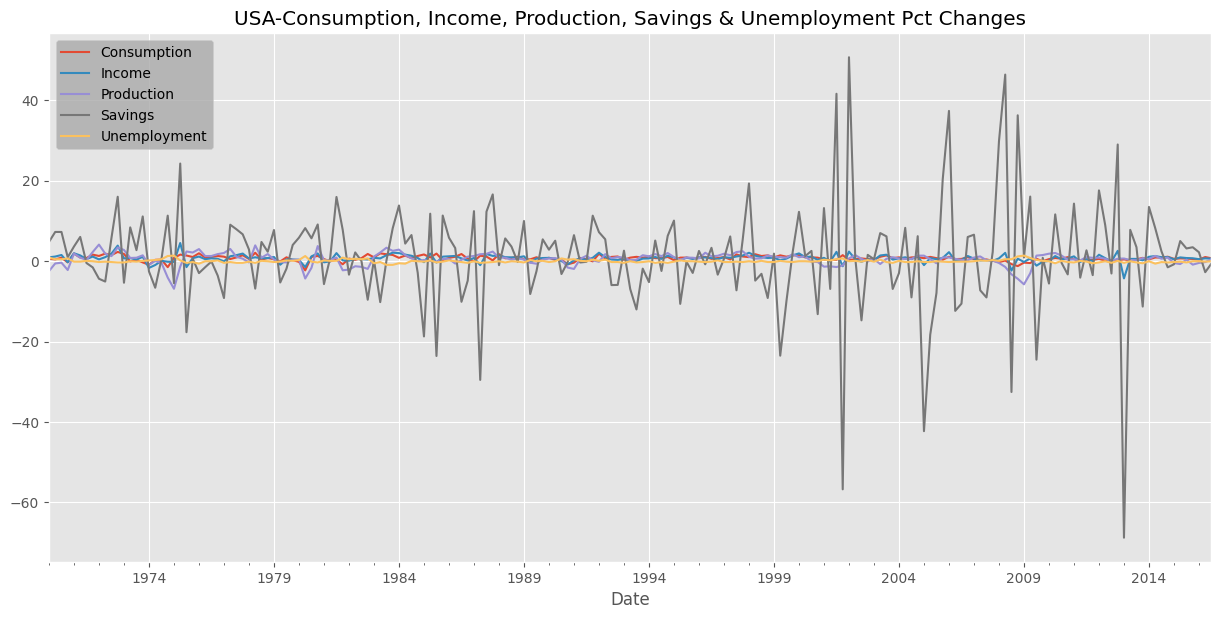

In [7]:
dataHolder.bucket[k].exploratory_plot()

## Air Passengers Data

In [8]:
k='airp_data'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Air Passengers (Monthly), Numbers in 1000's, from 1949 to 1960


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


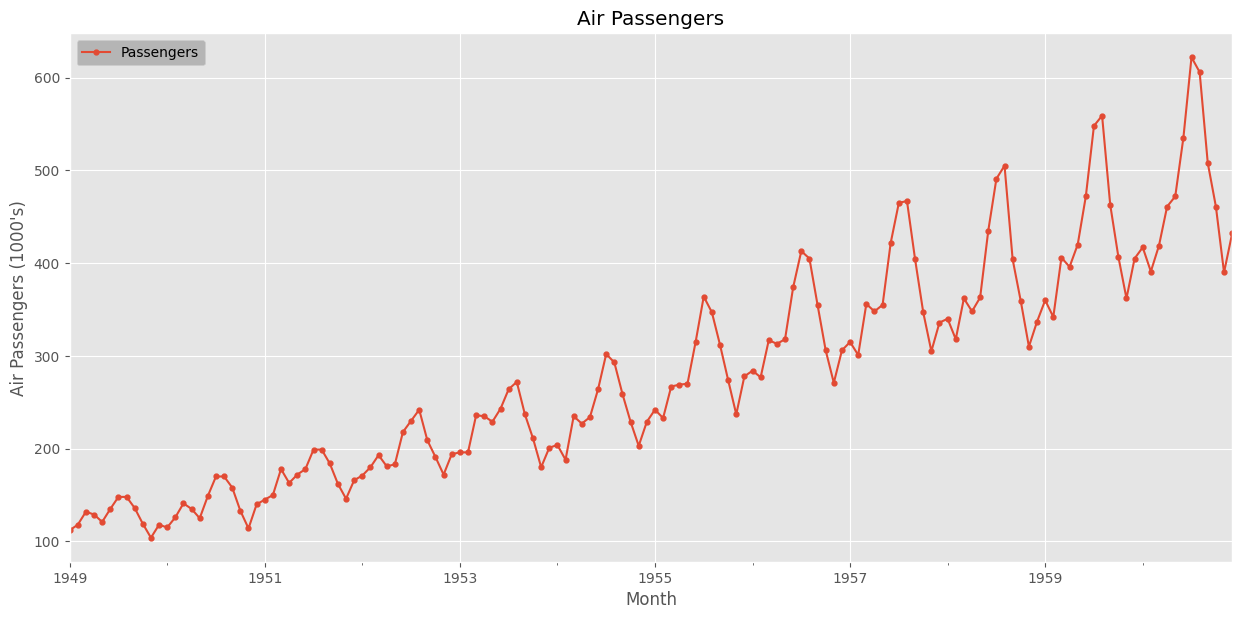

In [9]:
dataHolder.bucket[k].exploratory_plot()

## Beer Production Data

In [10]:
k='beer_prod'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Australlian Beer Production (Monthly), from , Numbers in Million Barrels, from 1956 to 1995


,MBP
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


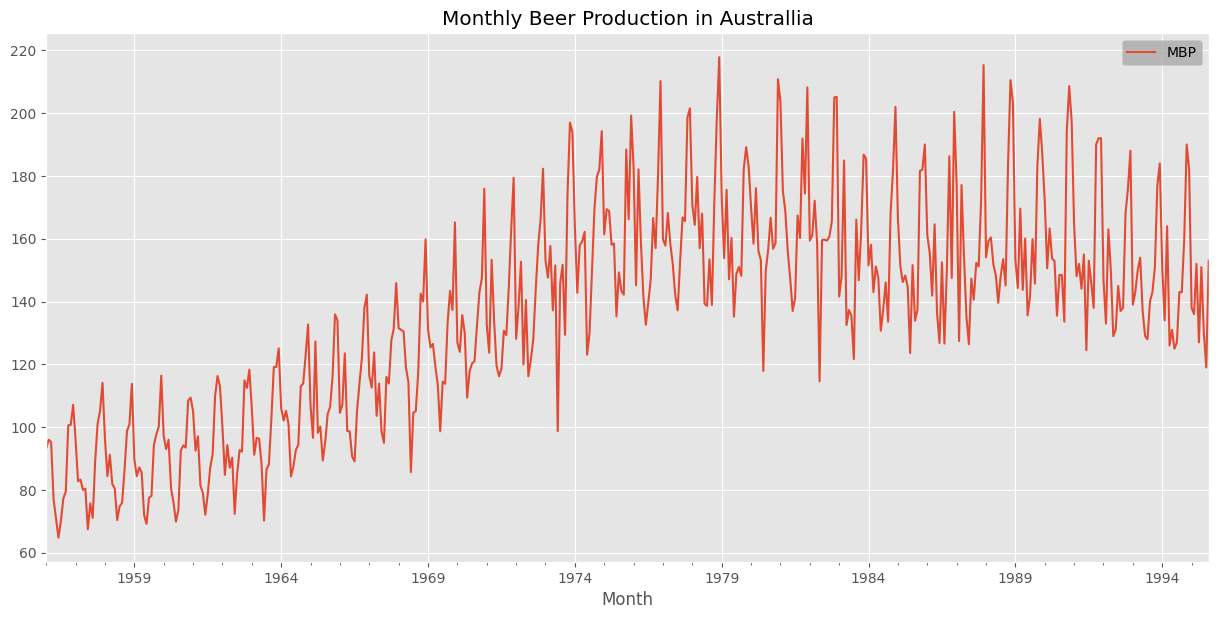

In [11]:
dataHolder.bucket[k].exploratory_plot()

## Britannia Stock Data

In [12]:
k='brit_stock'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Britannia's Stock Data (Buisness Daily), including Open, High, Low, Close & Volume of the Ticker, from 1996 to 2020


,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,10.6000,10.6000,10.6000,10.6000,1500.0
1996-01-03,10.6667,10.6667,10.4667,10.4667,3000.0
1996-01-05,10.6667,10.6667,10.4667,10.4733,6000.0
1996-01-08,10.3333,10.5333,10.3333,10.5333,3000.0
1996-01-10,10.0667,10.0667,10.0667,10.0667,1500.0


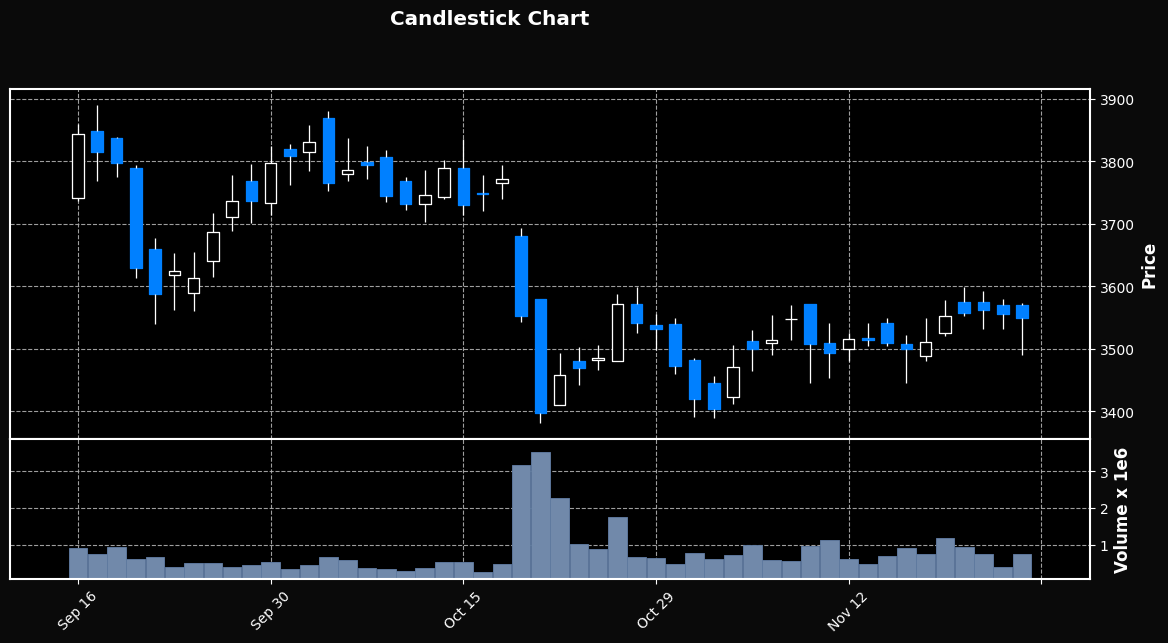

In [13]:
dataHolder.bucket[k].exploratory_plot()

# Correlation

**Correlation** : Two variables are said to be correlated when the value assumed by one affects the distribution of the other. It reflects the association between the two variables whose strength usually lies within the range of -1 to +1. If, as the value of X increase there is an increase in Y, then X & Y are said to be positively correlated. Also if, as the value of X decrease there is an increase in Y, then X & Y are said to be negatively correlated.

Different Types Of Correlations

<img src='https://miro.medium.com/max/2000/1*cxBhYwEBPLvs0E8E7Ehe_g.png' width='500'>

- Pearson Correlation : Quantifying association between Two continuous features.
\begin{equation}
    \rho_{p}=\frac{Cov(X,Y)}{\sigma_{x} \sigma_{y}} = \frac{\sum_{i=1}^{n}((x_{i}-\bar{x})(y_{i}-\bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2 }*{\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2 }}}
\end{equation}


- Spearman Correlation : Quantifying `RANK` association between ordinal & continuous features.
\begin{equation}
    \rho_{s}=\frac{Cov(rank(X),rank(Y))}{\sigma_{rank(x)} \sigma_{rank(y)}} = \frac{\sum_{i=1}^{n}((rank(x_{i})-rank(\bar{x}))(rank(y_{i})-rank(\bar{y}))}{\sqrt{\sum_{i=1}^{n}(rank(x_{i})-rank(\bar{x}))^2 }*{\sqrt{\sum_{i=1}^{n}(rank(y_{i})-rank(\bar{y}))^2 }}}
\end{equation}


- Kendall Tau Correlation : Quantifying `RANK` association between ordinal & continuous features, works quite well with Non-Normally distributed data.

\begin{equation}
    \tau_{k} = \frac{\sum_{i=1}^{n} \sum_{j=1}^{n} signum(x_{i}-x_{j}) signum(y_{i}-y_{j})}{n(n-1)}
\end{equation}

- Point Biserial Correlation : Quantifying association between Nominal and Continous Feature.

\begin{equation}
    r_{pb} = \frac{M_{1}-M_{0}}{s_{n}}\sqrt{\frac{n_{0}n_{1}}{n_{2}}}
\end{equation}


    - Here > M1 : Mean of target across 1 category, ; M2 : Mean of the target across 0 category; sn : Standard Deviation in the data; n0, n1: count of the number of datapoints in each category; n : Total number of datapoints.

- Annova eta values : Quantifying association between Two nominal features.

[A comparision of the Correlations](https://ag-ds-bubble.medium.com/correlations-pearson-correlation-is-not-one-solution-for-all-25f7220220fe)


****

But be wary of the correlations though, because `Correlation` doesnt always translation into `Causation`

[Spurious Correlations](https://tylervigen.com/spurious-correlations)
<img src='../Materials/Spurious Correlation.png'>



In [14]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('ggplot')
plt.rcParams['legend.facecolor'] = 'black'

In [15]:
from scipy.stats import pearsonr, kendalltau, spearmanr, pointbiserialr

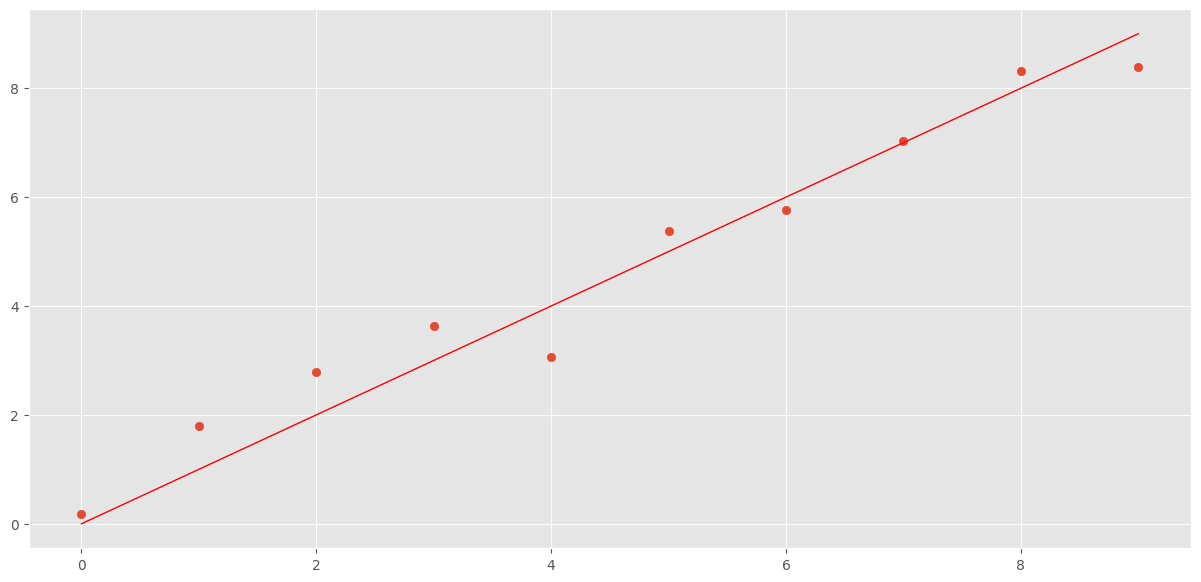

In [18]:
np.random.seed(20)
n = 10
x=np.arange(n)
y=x+np.random.uniform(low=-1,high=1, size=len(x))*1

# x = x/np.linalg.norm(x)
# y = y/np.linalg.norm(y)

_=plt.scatter(x,y)
_=plt.plot(x,x,c='r')

In [19]:
x_mean = np.mean(x)
y_mean = np.mean(y)

x_deviat = x-x_mean
y_deviat = y-y_mean

numerator = sum(x_deviat*y_deviat)
denominator = np.sqrt(sum(x_deviat**2))*np.sqrt(sum(y_deviat**2))
pearson_corr = numerator/denominator

pearson_corr, pearsonr(x,y)

(0.9833538865629297, (0.9833538865629297, 3.292514592502325e-07))

In [20]:
np.corrcoef(x,y)

array([[1.        , 0.98335389],
       [0.98335389, 1.        ]])

In [21]:
pd.DataFrame(np.c_[x,y]).corr()

,0,1
0,1.000000,0.983354
1,0.983354,1.000000


In [22]:
usa_cipsu_data = dataHolder.bucket['usa_economic'].data.copy()

In [23]:
usa_cipsu_data.corr(method='pearson')

,Consumption,Income,Production,Savings,Unemployment
Consumption,1.000000,0.398779,0.547306,-0.239900,-0.540557
Income,0.398779,1.000000,0.277788,0.713579,-0.230470
Production,0.547306,0.277788,1.000000,-0.068661,-0.786735
Savings,-0.239900,0.713579,-0.068661,1.000000,0.110356
Unemployment,-0.540557,-0.230470,-0.786735,0.110356,1.000000


In [24]:
pearsonr(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

(-0.7867346578393195, 1.2918219310358744e-40)

In [25]:
kendalltau(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

KendalltauResult(correlation=-0.4522515864903341, pvalue=1.505716248165009e-18)

In [26]:
spearmanr(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

SpearmanrResult(correlation=-0.5956431956976395, pvalue=2.4319494039211435e-19)

In [27]:
# Generating Correlation Heatmaps
corr_df = usa_cipsu_data.corr(method='pearson')
corr_df = corr_df.style
corr_df = corr_df.background_gradient(cmap=sns.light_palette("red", as_cmap=True))
corr_df = corr_df.highlight_max(color='black')
corr_df

,Consumption,Income,Production,Savings,Unemployment
Consumption,1.000000,0.398779,0.547306,-0.239900,-0.540557
Income,0.398779,1.000000,0.277788,0.713579,-0.230470
Production,0.547306,0.277788,1.000000,-0.068661,-0.786735
Savings,-0.239900,0.713579,-0.068661,1.000000,0.110356
Unemployment,-0.540557,-0.230470,-0.786735,0.110356,1.000000


In [32]:
lagged_data = pd.DataFrame()
for elag in range(5):
    for ecol in ['Consumption', 'Income']:
        lagged_data[ecol+'_{0}'.format(elag)] = usa_cipsu_data['Consumption'].shift(elag)
lagged_datacorr=lagged_data.corr()
lagged_datacorr = lagged_datacorr[['Income_0', 'Income_1', 'Income_2', 'Income_3', 'Income_4']]
lagged_datacorr = lagged_datacorr[lagged_datacorr.index.isin(['Consumption_0','Consumption_1','Consumption_2',
                                              'Consumption_3','Consumption_4'])]
lagged_datacorr

,Income_0,Income_1,Income_2,Income_3,Income_4
Consumption_0,1.000000,0.349959,0.314355,0.334530,0.145282
Consumption_1,0.349959,1.000000,0.350226,0.314503,0.334560
Consumption_2,0.314355,0.350226,1.000000,0.351971,0.315446
Consumption_3,0.334530,0.314503,0.351971,1.000000,0.351508
Consumption_4,0.145282,0.334560,0.315446,0.351508,1.000000


In [29]:
lagged_datacorrst = lagged_datacorr.copy().style
lagged_datacorrst = lagged_datacorrst.background_gradient(cmap=sns.light_palette("red", as_cmap=True))
lagged_datacorrst = lagged_datacorrst.highlight_max(color='black')
lagged_datacorrst

,Income_0,Income_1,Income_2,Income_3,Income_4
Consumption_0,1.000000,0.349959,0.314355,0.334530,0.145282
Consumption_1,0.349959,1.000000,0.350226,0.314503,0.334560
Consumption_2,0.314355,0.350226,1.000000,0.351971,0.315446
Consumption_3,0.334530,0.314503,0.351971,1.000000,0.351508
Consumption_4,0.145282,0.334560,0.315446,0.351508,1.000000


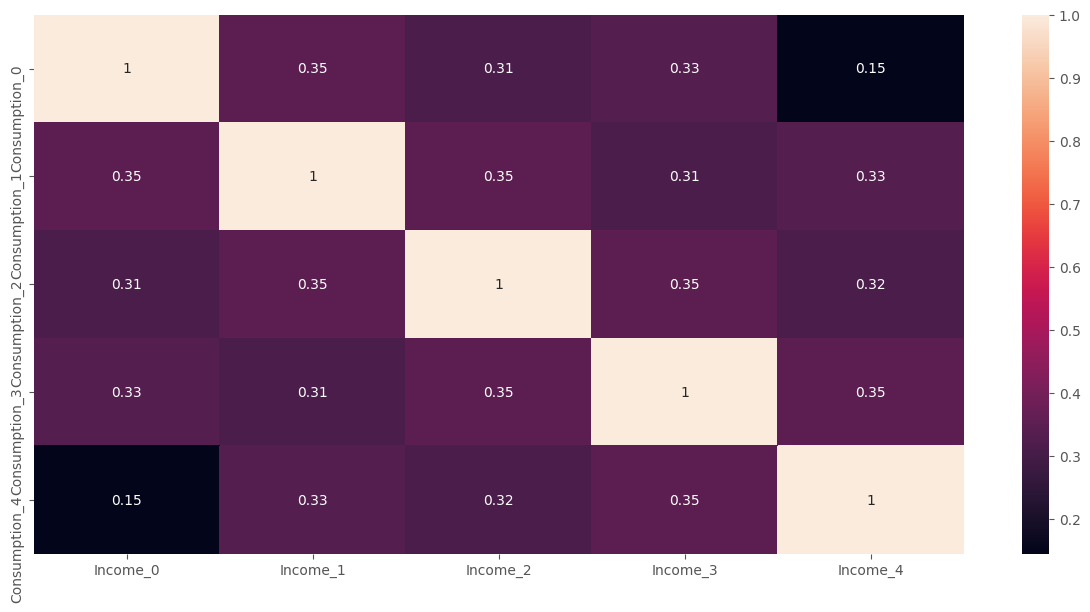

In [30]:
_=sns.heatmap(lagged_datacorr, annot=True)

# Autocorrelation

Since Time Series, of any Object - being measured, is something which is not `expected` to abruptly shift from its trajectory/course which stems a notion of previous `timestamped` values having some association/correlation with the values in very near future/ in a particular seasonal patter to arise. This concpet is something we can take advantage of for predicting the future.

Use of AutoCorrelation can be Multiple :- 

- Figuring out which model to use
- Estimating the parameters of the models
- Understanding the Underlying structure of the Time Series

****
There are two forms of Auto-Correlation that are used in Time Series Analysi

- ***Auto-Correlation*** : Auto-Correlation as designed above is something which lets us gauge into the internal structure as to how are the previous datapoints related to the ones that are to come. But the catch here is that, 

Suppose we are calcluate Auto - Correlation between 
  
1)  AC between $y_{t}$ and $y_{t-1}$  = 0.78

2)  AC between $y_{t}$ and $y_{t-2}$ = 0.76

And we have the following conversation :- 


**Me :)** Were we to use both of these variables as predictors, since $y_{t-1}$ is already explaining 78% of variance(correlation, for simplicity) of the $y_{t}$, would it be even helpful to use $y_{t-2}$?

**You:)** Well it is having 0.76 correlation, maybe? 🧐

**Me:)** Ok, then i will reverse my question, if $y_{t-2}$ is having 0.76 correlation, would it be wise for us to even consider the $y_{t-1}$ series?

**You:)** Well I dont really know, I understand that the there will be effect of $y_{t-2}$ in the $y_{t-1}$ series but how do i quantify that?

**Me:)** PARTIAL AUTO CORRELATION 

**You:)** 🤩🤩🤩🤩, wait, what is Partial Auto Correlation and how do i quantify it?


Getting a value of correlation neglecting the compunding effect of the series..

- ***Partial Auto-Correlation*** : 

**Me:)** Effectively what we need from Partial Auto-Correlation is for us to tell that what is the effect of `Individual Lagged Time Series` $y_{t-n}$ on the current time series $y_{t}$. So this is what we do :-

- 1.) Take the series $y_{t-1}$ and  $y_{t}$
- 2.) Regress $y_{t-1}$ on  $y_{t}$ and note the Correlation between the two.
- 3.) Take the residuals(Whatever $y_{t-1}$ wasnt able to explain of $y_{t}$) of that regression, basically the errors
- 4.) Now regress the $y_{t-2}$ on the `errors`, and repeat...

[Partial Auto Correlation](https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac)

Lets jump to code!


<b>Auto-Correlation</b>

In [33]:
from statsmodels.graphics.tsaplots import acf, plot_acf, pacf, plot_pacf

In [34]:
tempdata = lagged_data[[k for k in lagged_data.columns if 'Con' in k]]
tempdata.corr().iloc[:,0]

Consumption_0    1.000000
Consumption_1    0.349959
Consumption_2    0.314355
Consumption_3    0.334530
Consumption_4    0.145282
Name: Consumption_0, dtype: float64

array([1.        , 0.3499212 , 0.31397023, 0.33385183, 0.14401974])

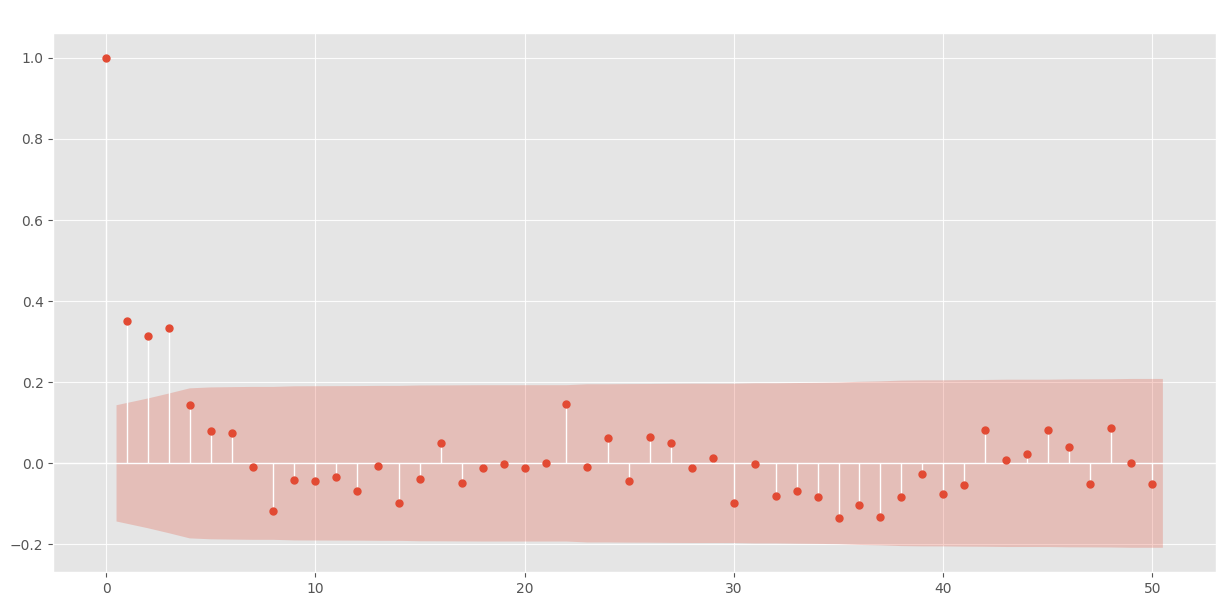

In [35]:
_=plot_acf(lagged_data.Consumption_0, lags=50)
acf(lagged_data.Consumption_0)[:5]

<b>Partial Auto-Correlation</b>

In [36]:
from sklearn import linear_model

def calc_pacf(data, lags = 2):
    data.name='y'
    data = data.to_frame()
    pcorr=[]
    
    if lags==1:
        return [1]
    elif lags==2:
        data['y_L1'] = data.y.shift(1)
        return [1, data.corr().values[1][0]]
    else:
        data['y_L1'] = data.y.shift(1)
        pcorr = [1, data.corr().values[1][0]]
        
        for _l in range(2,lags):
            _tlag_col = 'y_L_{0}'.format(_l)
            calcData = data.y.to_frame().copy()
            calcData[_tlag_col] = calcData.y.shift(_l)
            reg_cols = []
            for _ll in range(1,_l):
                scol = 'y_L_{0}'.format(_ll)
                calcData[scol] = calcData.y.shift(_ll)
                reg_cols.append(scol)
            calcData = calcData.dropna()
            
            # Fit the first Linear Model on t_i
            _model = linear_model.LinearRegression()
            _model.fit(calcData[reg_cols], calcData['y'])
            _resid1 = calcData['y']-_model.predict(calcData[reg_cols])
            # Fit the first Linear Model on t_l
            _model = linear_model.LinearRegression()
            _model.fit(calcData[reg_cols], calcData[_tlag_col])
            _resid2 = calcData[_tlag_col]-_model.predict(calcData[reg_cols])
            pcorr.append(pearsonr(_resid1.values, _resid2.values)[0])
            
        return pcorr


In [37]:
calc_pacf(lagged_data.Consumption_0,10)

[1,
 0.34995917948916117,
 0.21865876117960048,
 0.20532038981349574,
 -0.06930920682910445,
 -0.07500885865116029,
 -0.010554291083197932,
 -0.0416574253589047,
 -0.13739012793374936,
 0.028828384674378673]

array([ 1.        ,  0.3518025 ,  0.22094473,  0.20947002, -0.06991332,
       -0.07718982, -0.01104804, -0.04182686, -0.1403141 ,  0.02577213])

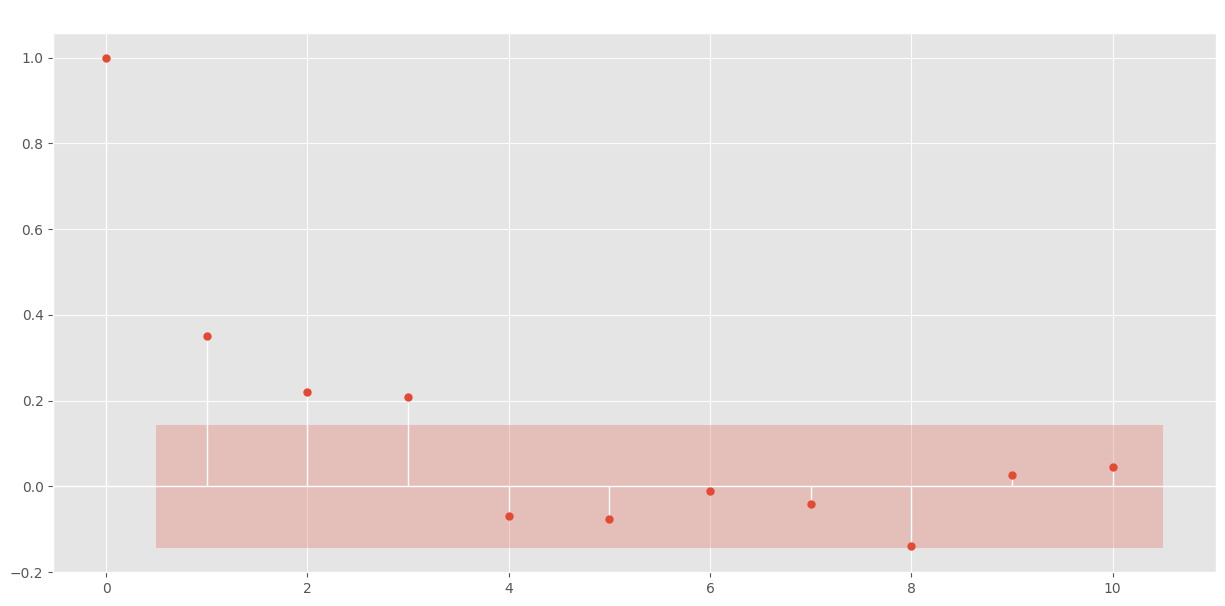

In [38]:
_=plot_pacf(lagged_data.Consumption_0, lags=10)
pacf(lagged_data.Consumption_0)[:10]

# Stationarity

Dealing with Time Series Models come with some assumptions, especially univariate models, in which `Stationarity` is one of the primary requirements.

If a Time Series is Stationary, 
- The Time Series $y_{t}$ has a constant mean, i.e $E[Y_{t}]=const$
- The Time Series $y_{t}$ has a constant variance, i.e $Var[Y_{t}]=const$
- The Time Series $y_{t}$ doesnt exhibit seasonality.

How to detect if a Time Seiries is Stationary?
- Visual Inspection of the Time Series Plot
- Local & Global Tests
- Unit Root Tests - `ADF` Test & `KPSS` Test

In [39]:
airpassengers_data = dataHolder.bucket['airp_data'].data.copy()
beerprod_data = dataHolder.bucket['beer_prod'].data.copy()
britanniastock_data = dataHolder.bucket['brit_stock'].data.copy()

In [40]:
def get_splot1():
    fig, axes = plt.subplots(2,3, figsize=(20,10))
    _=usa_cipsu_data.Consumption.plot(ax=axes[0,0])
    _=axes[0,0].set_xlabel('')
    _=axes[0,0].set_ylabel('US Consumption pct change')
    _=usa_cipsu_data.Income.plot(ax=axes[0,1])
    _=axes[0,1].set_xlabel('')
    _=axes[0,1].set_ylabel('US Income pct change')
    _=usa_cipsu_data.Unemployment.plot(ax=axes[0,2])
    _=axes[0,2].set_xlabel('')
    _=axes[0,2].set_ylabel('US Unemployment pct change')


    _=airpassengers_data.Passengers.plot(ax=axes[1,0])
    _=axes[1,0].set_xlabel('')
    _=axes[1,0].set_ylabel('Passengers')
    _=beerprod_data.MBP.plot(ax=axes[1,1])
    _=axes[1,1].set_xlabel('')
    _=axes[1,1].set_ylabel('Beer Production')
    _=britanniastock_data.Close.plot(ax=axes[1,2])
    _=axes[1,2].set_xlabel('')
    _=axes[1,2].set_ylabel('Britannia Close prices')

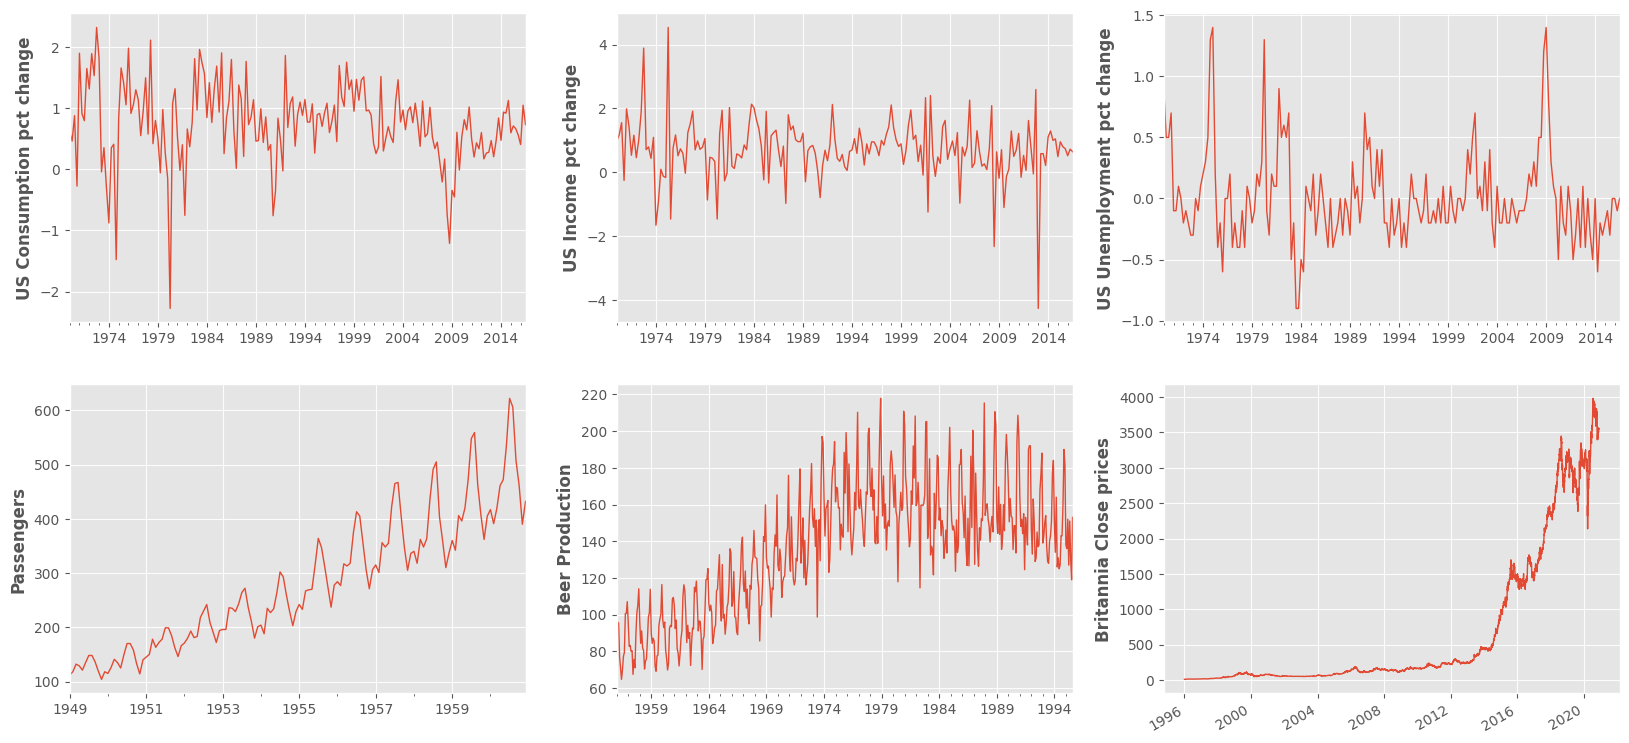

In [41]:
get_splot1()

Of these Time Series which do you think is Stationary?

In [42]:
# Unit Root Tests
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
    return dfoutput.to_frame()

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    return kpss_output.to_frame()

In [46]:
adf_test(usa_cipsu_data.Consumption)

,0
Test Statistic,-4.522487
p-value,0.000179
#Lags Used,2.000000
Number of Observations Used,184.000000
Critical Value (1%),-3.466398
Critical Value (5%),-2.877380
Critical Value (10%),-2.575214


In [47]:
kpss_test(usa_cipsu_data.Consumption)

,0
Test Statistic,0.235168
p-value,0.100000
Lags Used,7.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


# Statistical Tests

- Test for Seasonality (Strength)
- Test for Trend (Strength)
- Test for autocorrelation
- Test for Stationarity
- Test for Distribution

In [48]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats

## Quantifying the Seasonality & Trend
[Strength of Seasonality & Trend](https://otexts.com/fpp2/seasonal-strength.html#seasonal-strength)

In [49]:

def get_decompose_plot(data):
    data = data.copy()
    data.index.name = ''
    grid = plt.GridSpec(4, 2, wspace=0.1, hspace=0.5)
    series_ax = plt.subplot(grid[0:2, :])
    series_ax.set_title('Time Series')
    
#     ts_trnsfrm, blambda = boxcox(data['ts'])
#     data['ts'] = pd.Series(ts_trnsfrm, name='ts', index=data['ts'].index)
    data['ts'].plot(ax=series_ax)

    trend_ax = plt.subplot(grid[2, 0])
    trend_ax.set_title('Trend Series')
    data['Trend'].plot(ax=trend_ax)

    cycl_ax = plt.subplot(grid[2, 1])
    cycl_ax.set_title('Cyclic Component')
    data['Cyclicity'].plot(ax=cycl_ax)
    
    seas_ax = plt.subplot(grid[3, 0])
    seas_ax.set_title('Seasonal Component')
    data['Seasonality'].plot(ax=seas_ax)

    resid_ax = plt.subplot(grid[3, 1])
    resid_ax.set_title('Residuals/Noise')
    data['Residual'].plot(ax=resid_ax)
        
    return grid


GridSpec(4, 2)

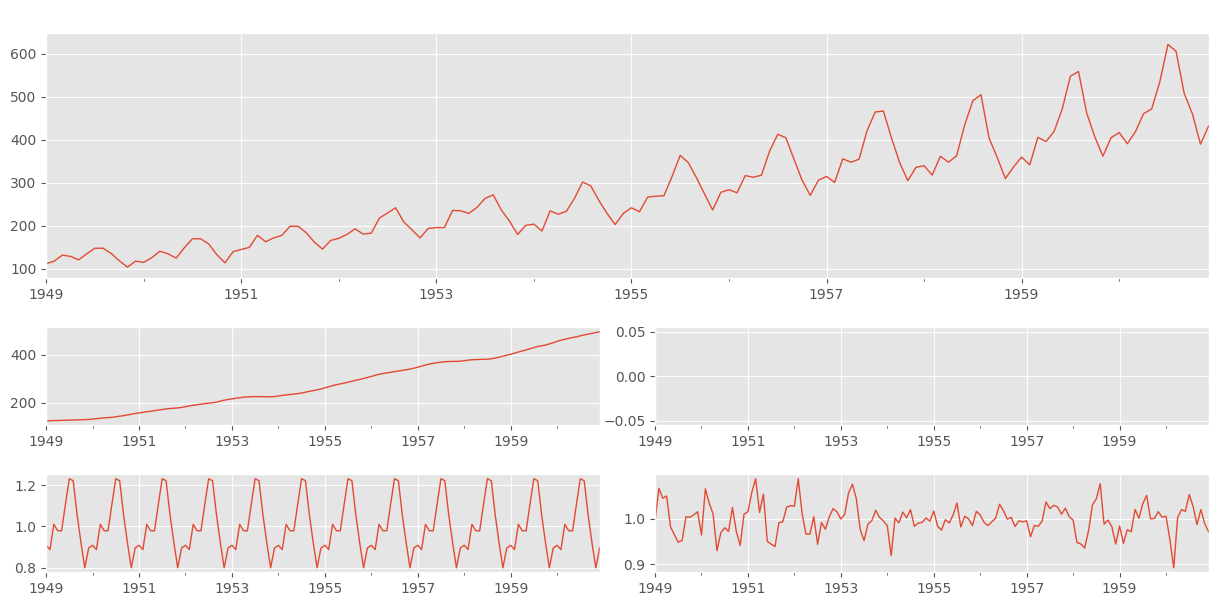

In [50]:
tsdata = airpassengers_data.Passengers
decomp=seasonal_decompose(tsdata, period=12, extrapolate_trend=True, model='multiplicative')

decomData = pd.DataFrame(columns=['Trend',  'Cyclicity', 'Seasonality', 'Residual'],
                         index=tsdata.index)

tt = decomp.trend
st = decomp.seasonal
rt = decomp.resid

decomData['Trend'] = tt
decomData['Seasonality'] = st
decomData['Residual'] = rt
decomData['ts'] = tsdata

get_decompose_plot(decomData)

In [51]:
_tmeasure=np.var(rt)/np.var(tt+rt)
_tmeasure = max([0, 1-_tmeasure])
print('Strength of Trend is : ', round(_tmeasure,4))

Strength of Trend is :  1.0


In [52]:
_measure=np.var(rt)/np.var(st+rt)
_measure = max([0, 1-_measure])
print('Strength of Seasonal is : ', round(_measure,4))

Strength of Seasonal is :  0.9353


## Tests for Auto-Correlation
- Durbin Watson Test
     - **Null Hypothesis :** There is no serial correlation in the residuals
     - **Alternate Hypothesis :** Residuals follow an AR1 process
     - **In Simple Terms :** If `p-value`<0.05(or any other significance value) then the auto-correlation is present, else if `p-value`>0.05 auto-correlation is absent.
     

In [53]:
durbin_watson(britanniastock_data.Close)

0.00027874644639298336

In [54]:
durbin_watson(usa_cipsu_data.Consumption)

0.564113468167673

In [55]:
durbin_watson(beerprod_data.MBP)

0.019486494992529867

## Tests For stationarity
- [Augmented Dickey Fuller (ADF) Test](https://www.youtube.com/watch?v=1opjnegd_hA)
     - **Null Hypothesis :** A unit root is present in a time series sample
     - **Alternate Hypothesis :** Depending on which version of the test is used, but is usually stationarity or trend-stationarity.
     - **In Simple Terms :** If ADF Test outputs `p-value`>0.05(or Significance level set by you), then the time series is non-stationary
     
     
- Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
     - **Null Hypothesis :** The data is stationary.
     - **Alternate Hypothesis :** The data is non-stationary.
     - **In Simple Terms :** If KPSS Test outputs `p-value`<0.05(or Significance level set by you), then the time series is non-stationary.

In [56]:
adf_test(beerprod_data.MBP)

,0
Test Statistic,-2.282661
p-value,0.177621
#Lags Used,17.000000
Number of Observations Used,458.000000
Critical Value (1%),-3.444709
Critical Value (5%),-2.867871
Critical Value (10%),-2.570142


In [57]:
kpss_test(beerprod_data.MBP)

,0
Test Statistic,2.965464
p-value,0.010000
Lags Used,12.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


## Tests for Distributions

- Jarque Bera Test
     - **Null Hypothesis :** The data is following a Normal Distribution
     - **Alternate Hypothesis :** The data is following some other distribution.
     - **In Simple Terms :** If Jarque Bera Test outputs `p-value`<0.05(or Significance level set by you), then the time series is not following a Normal Distribution.

In [58]:
def jb_test(timeseries):
    dftest = jarque_bera(timeseries)
    dfoutput = pd.Series(dftest, index=['JB', 'JBpv', 'skew', 'kurtosis'])
    dfoutput = dfoutput.to_frame()
    dfoutput.index.name = 'Measure'
    dfoutput.columns=['Value']
    return dfoutput

<AxesSubplot:ylabel='Density'>

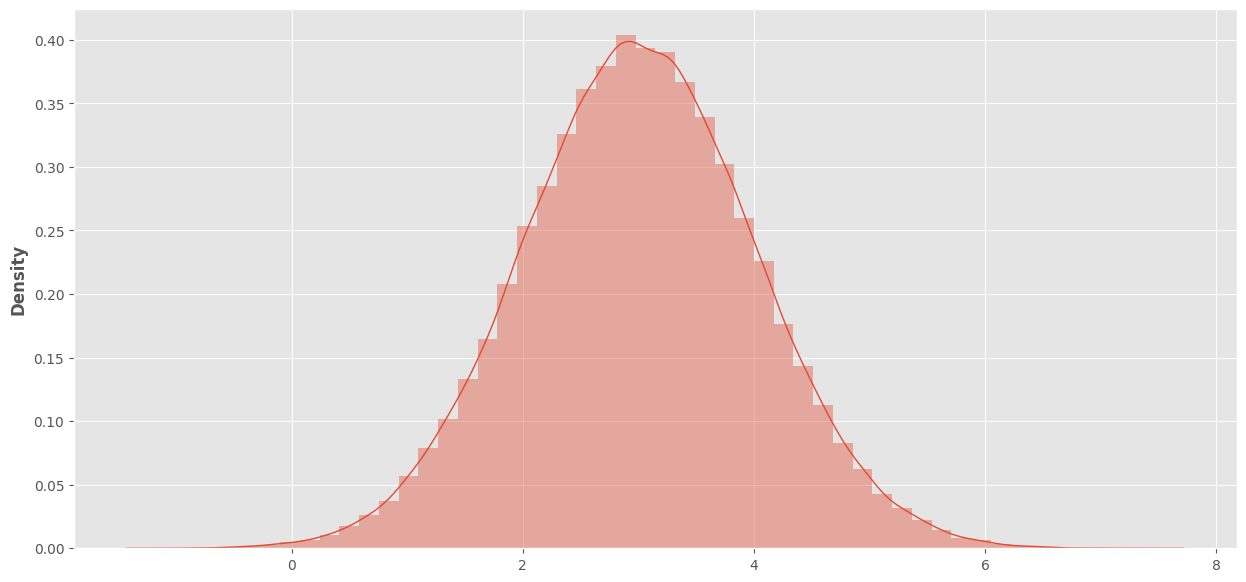

In [59]:
white_noise = np.random.normal(loc=3,size=int(1e5))
sns.distplot(white_noise)

In [60]:
jb_test(white_noise)

,Value
Measure,
JB,2.726876
JBpv,0.255780
skew,0.011538
kurtosis,3.011043


In [61]:
jb_test(usa_cipsu_data.Consumption)

,Value
Measure,
JB,7.262111e+01
JBpv,1.700303e-16
skew,-7.960697e-01
kurtosis,5.604889e+00


<b>Q-Q Plot</b>

If the line is straight then the data is following the normal distribution

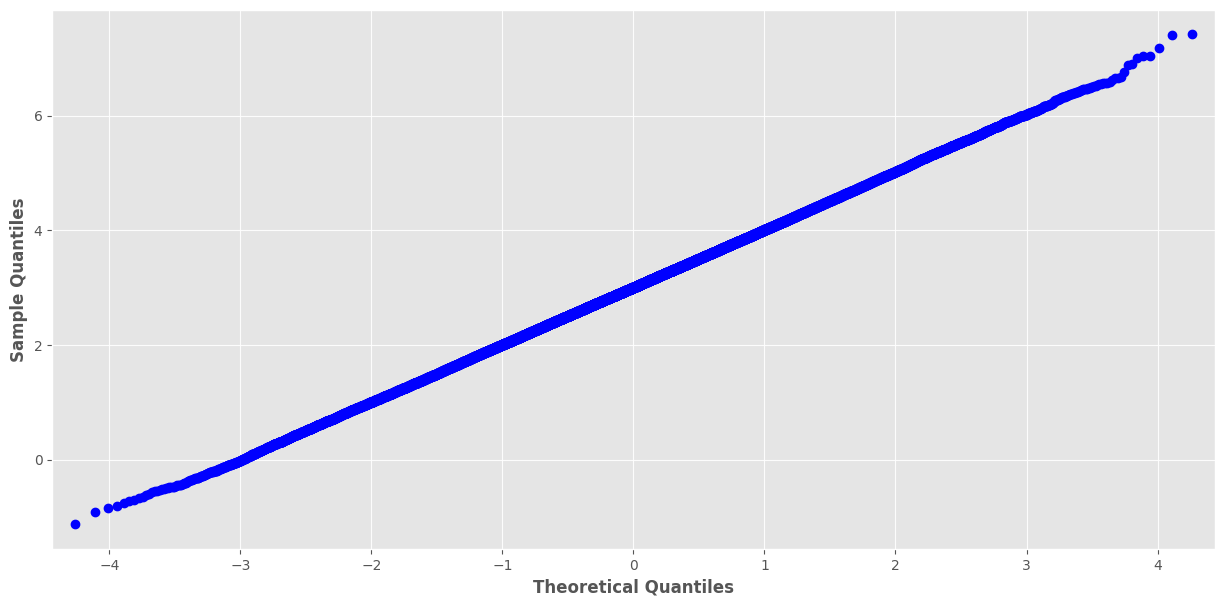

In [62]:
_=qqplot(white_noise)

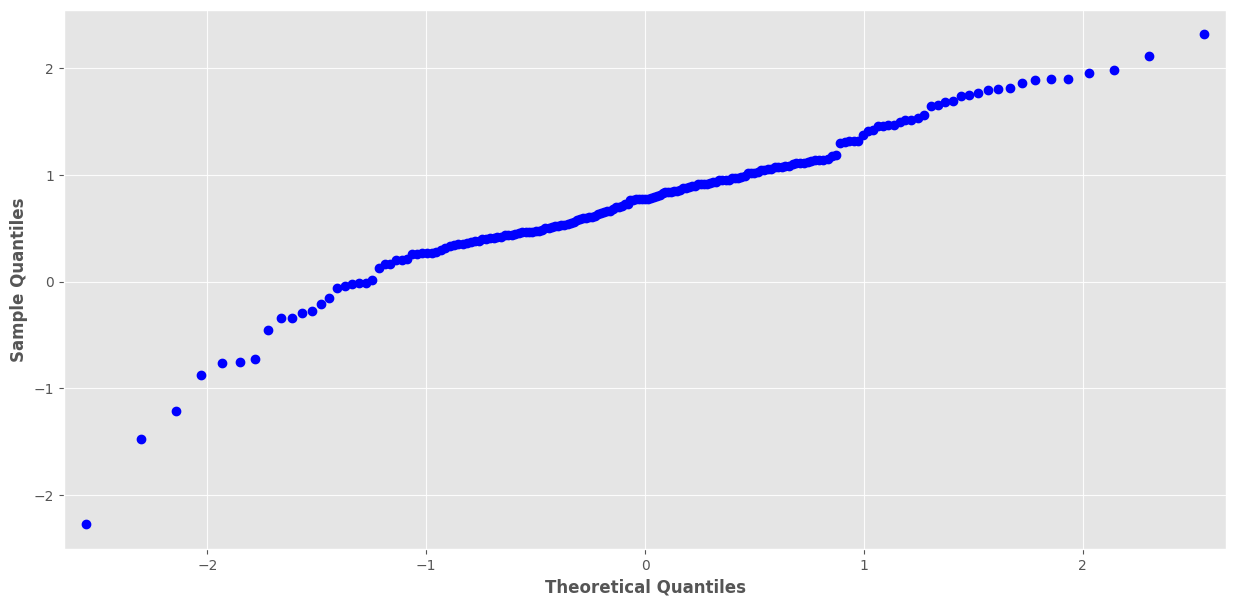

In [63]:
_=qqplot(usa_cipsu_data.Consumption)

# Model Metrics

- Mean Absolute Percentage Error (MAPE):
\begin{equation}
    MAPE = \frac{1}{n} \sum_{i=1}^{n}\left | \frac{y_{t}-\hat y_{t}}{y_{t}} * 100\right|
\end{equation}
- Mean Squared Error (MSE):
\begin{equation}
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{t}-\hat y_{t})^2
\end{equation}


> *Both MAPE & MSE dont have the sense of direction of the error, just the magnitude*

> *Both MAPE & MSE have their magnitude which is a reflectance of the error relative to actual target value*

> *MSE Penalises greater error more than the smaller error*

> *MAPE will become infinite if the actual data is 0*


- Custom Metrics : Based on the KPI's being tracked

<b>Effect on MSE as the prediction moves farther away from the actual</b>

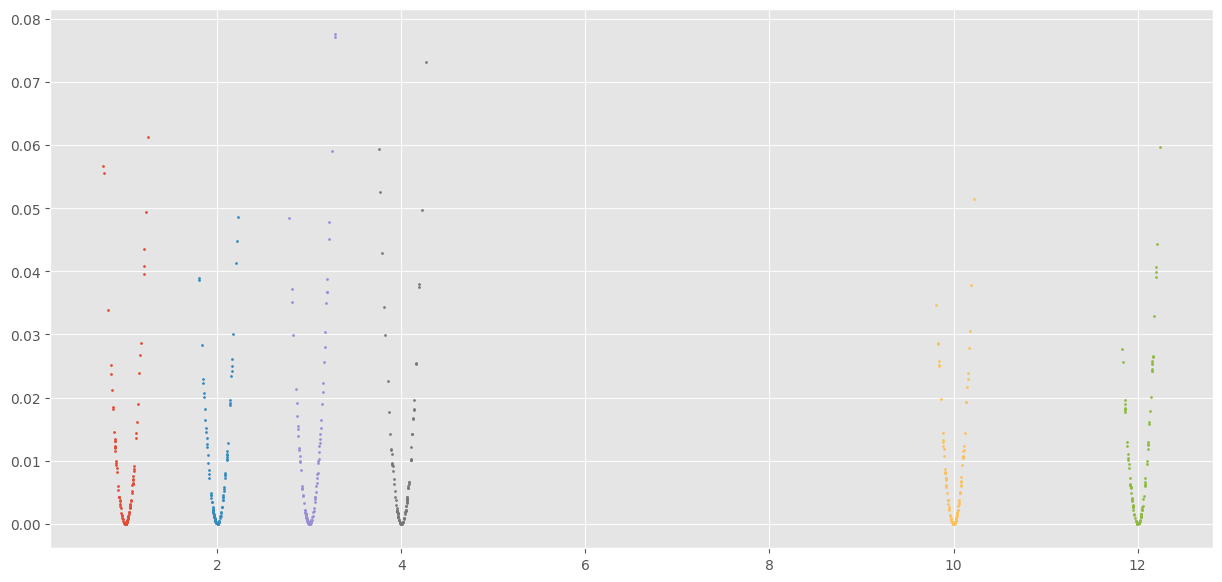

In [64]:
np.random.seed(4)
x=[1,2,3,4,10,12]
for ex in x:
    exp = ex+np.random.normal(scale=0.1,size=100)
    plt.scatter(exp, (exp-ex)**2, s=2)

<b>Effect on MAPE as the prediction moves farther away from the actual</b>

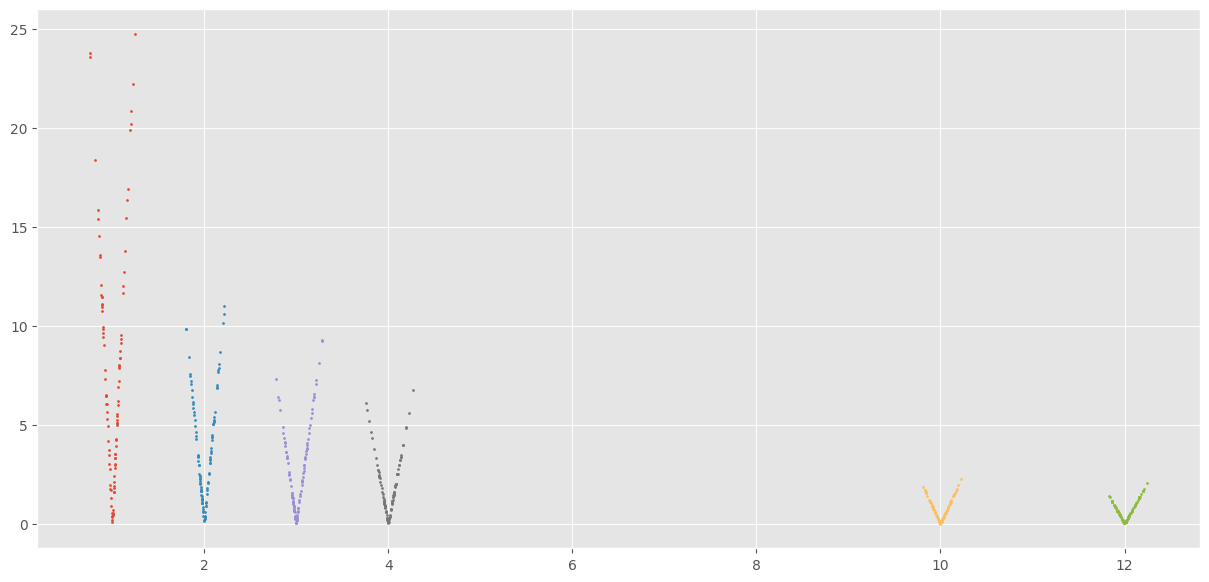

In [65]:
np.random.seed(4)
x=[1,2,3,4,10,12]
for ex in x:
    exp = ex+np.random.normal(scale=0.1,size=100)
    plt.scatter(exp, 100*(abs(exp-ex)/ex),s=2)


<b>Calculation of the Metrics<b>

In [66]:
from statsmodels.tsa.arima_model import ARIMA
ydata = dataHolder.bucket['beer_prod'].data.copy()
model=ARIMA(ydata.MBP, (1,0,3))
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    MBP   No. Observations:                  476
Model:                     ARMA(1, 3)   Log Likelihood               -2036.624
Method:                       css-mle   S.D. of innovations             17.407
Date:                Mon, 07 Dec 2020   AIC                           4085.248
Time:                        13:20:35   BIC                           4110.241
Sample:                    01-01-1956   HQIC                          4095.076
                         - 08-01-1995                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.9917     27.254      4.476      0.000      68.575     175.408
ar.L1.MBP      0.9985      0.002    570.780      0.000       0.995       1.002
ma.L1.MBP     -0.4733      0.046    -10.310      0.000      -0.563      -0.383
ma.L2.MBP     -0.3145      0.071     -4.461      0.000      -0.453      -0.176
ma.L3.MBP     -0.1146      0.051     -2.258      0.024      -0.214      -0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1            1.0655           -0.0000j            1.0655           -0.0000
MA.2           -1.9044           -2.1354j            2.8612           -0.3659
MA.3           -1.9044           +2.1354j            2.8612            0.3659
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

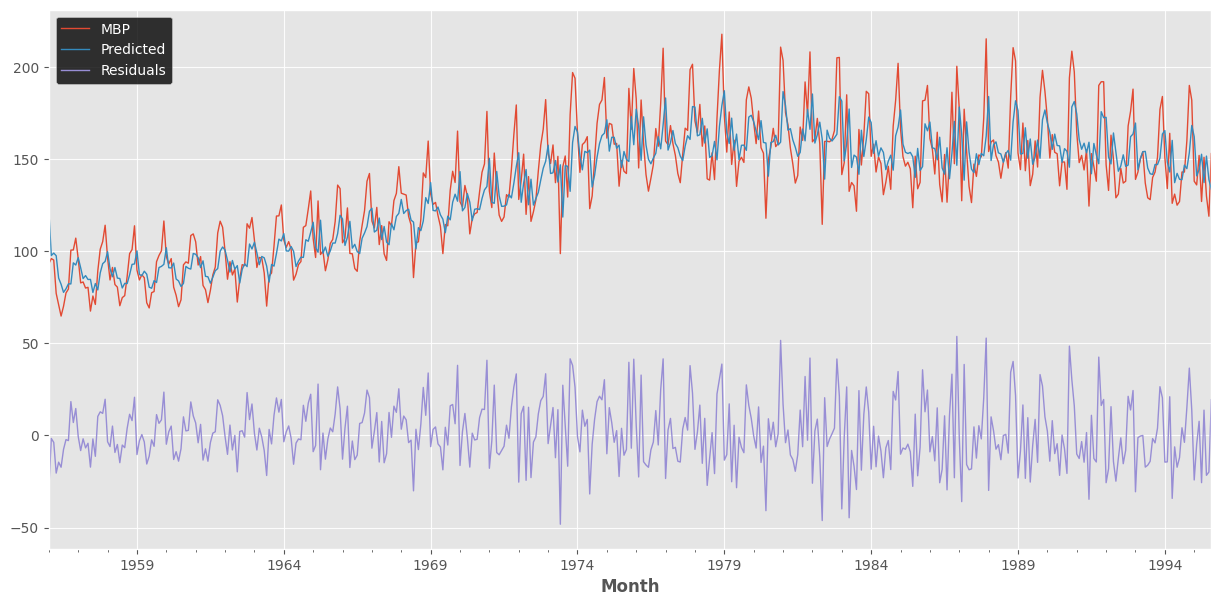

In [71]:
ydata['Predicted'] = fit.predict(0,475)
ydata.plot()

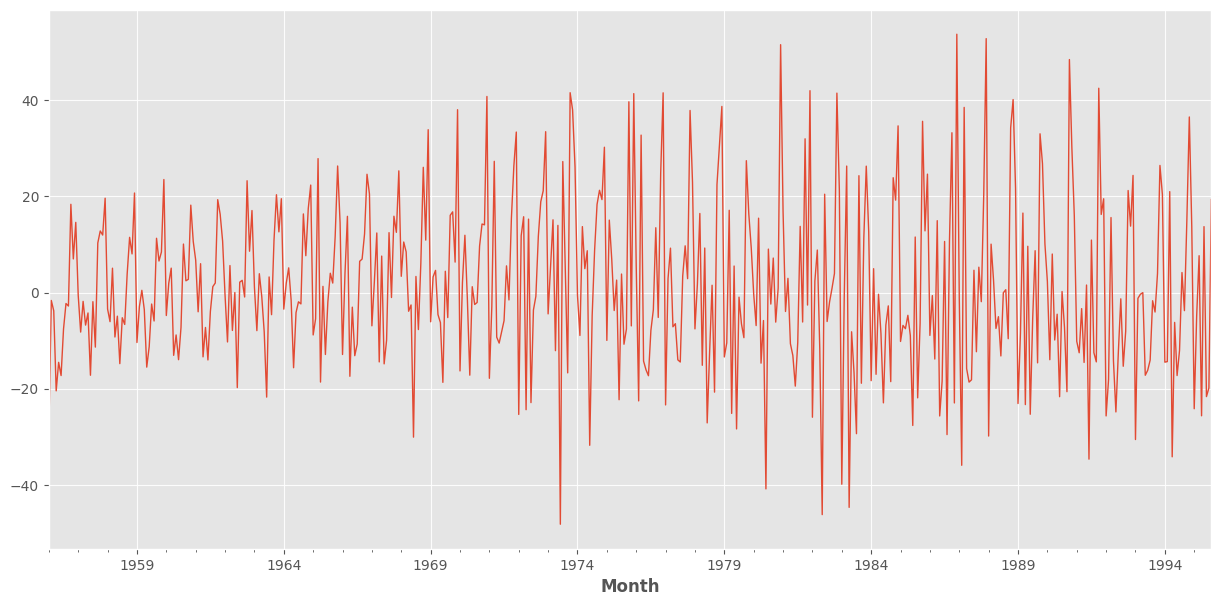

In [72]:
ydata['Residuals'] = ydata.MBP - ydata.Predicted
_=ydata.Residuals.plot()

In [69]:
resid = ydata.Predicted-ydata.MBP
resid_scaled = resid/ydata.MBP
resid_scaledabs = sum(abs(resid_scaled))
mape = 100*(resid_scaledabs/ydata.shape[0])
mape = round(mape, 3)
print('MAPE : ', mape, '%')

MAPE :  9.99 %


In [74]:
resid = ydata.MBP-ydata.Predicted
resid_scaled = resid**2
mse = np.mean(sum(resid_scaled))
mse = round(mse, 3)
print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))

MSE :  145012.727
RMSE :  380.80536629622225


**Q)** What do you think will be the shortcomings for MAPE?

- If the Acutals are zero, then the MAPE becomes `inf`
- MAPE is not able to capture the direction of the error!

# Random Testing Space